In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
tweets_df = pd.read_csv('/content/tweets3.csv')

In [ ]:
print("First few rows of the dataset:")
print(tweets_df.tail())

First few rows of the dataset:
      Tweet_count         Username  \
1280         1281   Autonomics Web   
1281         1282  Tunk SaiKumar ❂   
1282         1283  Abhishek@GeekFG   
1283         1284    Ishan Agarwal   
1284         1285      Kunal Singh   

                                                   Text  \
1280  🚨Breaking: Google expands Pixel availability t...   
1281  Google Pixel 9 Series will be available in off...   
1282  BREAKING NEWS]\n\nIt looks like Google will fi...   
1283  Google Pixel 9 series is back to offline store...   
1284  Google Pixel 9 Series will now be available of...   

                          Created At  Retweets  Likes  
1280  Sun Aug 11 13:11:37 +0000 2024         0      1  
1281  Sun Aug 11 11:10:13 +0000 2024         1      1  
1282  Sun Aug 11 11:06:16 +0000 2024         0      0  
1283  Sun Aug 11 10:01:02 +0000 2024        26    584  
1284  Sun Aug 11 09:56:35 +0000 2024         0      2  


In [ ]:
print("\nMissing values in the dataset:")
print(tweets_df.isnull().sum())


Missing values in the dataset:
Tweet_count    0
Username       0
Text           0
Created At     0
Retweets       0
Likes          0
dtype: int64


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove mentions (e.g., @username) and hashtags (e.g., #hashtag)
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join the processed words back into a single string
    return ' '.join(words)

In [ ]:
tweets_df['cleaned_tweet'] = tweets_df['Text'].apply(preprocess)

In [ ]:
all_words = ' '.join([text for text in tweets_df['cleaned_tweet']])

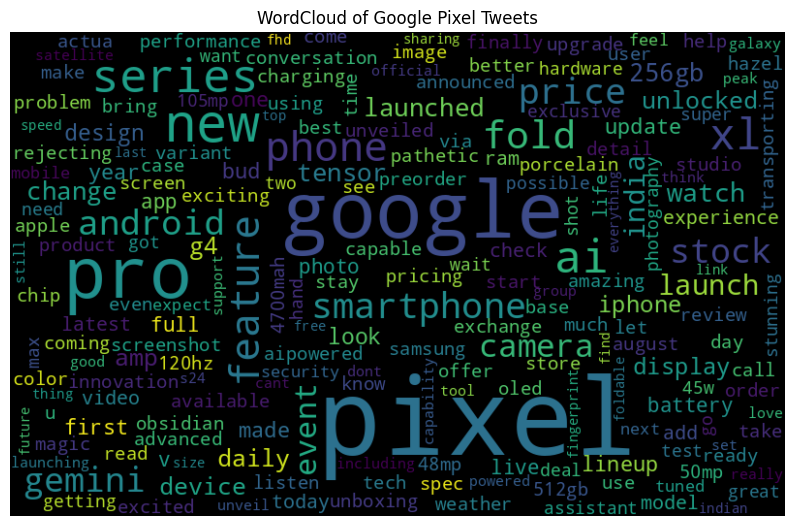

In [ ]:
wordcloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('WordCloud of Google Pixel Tweets')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer=TfidfVectorizer()
tfidf_matrix=tfidf_vectorizer.fit_transform(tweets_df['cleaned_tweet'])


tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

mean_tfidf=tfidf_df.mean().sort_values(ascending=False)

print(mean_tfidf)

pixel     0.094747
google    0.069618
pro       0.068665
new       0.033640
series    0.030181
            ...   
f168      0.000120
f17       0.000120
f22       0.000120
105       0.000120
ga        0.000120
Length: 2803, dtype: float64


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

In [ ]:
tweets_df[['polarity', 'subjectivity']] = tweets_df['cleaned_tweet'].apply(lambda x: pd.Series(get_sentiment(x)))

In [ ]:
print("\nDataFrame with polarity and subjectivity:")
print(tweets_df[['cleaned_tweet', 'polarity', 'subjectivity']].head())


DataFrame with polarity and subjectivity:
                                       cleaned_tweet  polarity  subjectivity
0  pathetic rejecting order capable transporting ...   -0.1125        0.7375
1  pathetic rejecting order capable transporting ...   -0.1125        0.7375
2  pathetic rejecting order capable transporting ...   -0.1125        0.7375
3  pathetic rejecting order capable transporting ...   -0.1125        0.7375
4  pathetic rejecting order capable transporting ...   -0.1125        0.7375


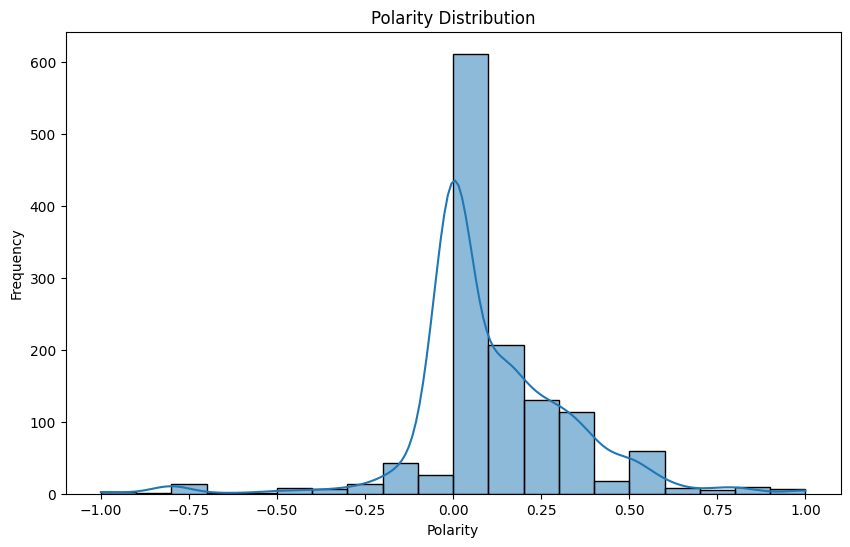

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['polarity'], bins=20, kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

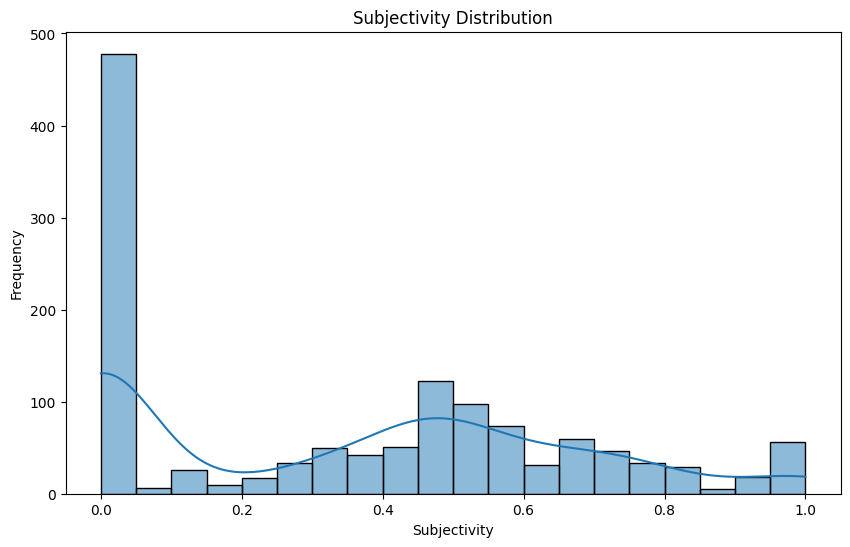

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tweets_df['subjectivity'], bins=20, kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
tweets_df['sentiment'] = tweets_df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [ ]:
sentiment_counts = tweets_df['sentiment'].value_counts()

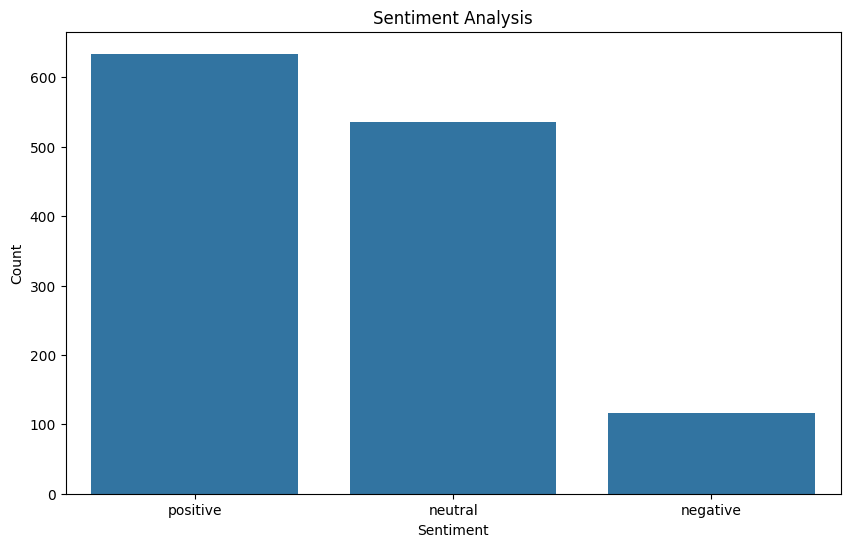

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
from transformers import pipeline
import pandas as pd

df = pd.read_csv('/content/tweets3.csv')


sentiment_analyzer = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")


df['Sentiment'] = df['Text'].apply(lambda tweet: sentiment_analyzer(tweet)[0]['label'])


print(df[[ 'Username', 'Text', 'Sentiment']])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


             Username                                               Text  \
0         HEMANG 🎮⚽🏑🍕  @GoogleIndia @Flipkart @cromaretail @RelianceD...   
1         HEMANG 🎮⚽🏑🍕  @kkumarchaurasia @Flipkart @Moto @flipkartsupp...   
2         HEMANG 🎮⚽🏑🍕  @aHeirToTheDemon @abhishek @flipkartsupport @F...   
3         HEMANG 🎮⚽🏑🍕  @GoogleIndia Pathetic..\n@Flipkart is rejectin...   
4         HEMANG 🎮⚽🏑🍕  @mostly_rude_ @flipkartsupport @Flipkart Pathe...   
...               ...                                                ...   
1280   Autonomics Web  🚨Breaking: Google expands Pixel availability t...   
1281  Tunk SaiKumar ❂  Google Pixel 9 Series will be available in off...   
1282  Abhishek@GeekFG  BREAKING NEWS]\n\nIt looks like Google will fi...   
1283    Ishan Agarwal  Google Pixel 9 series is back to offline store...   
1284      Kunal Singh  Google Pixel 9 Series will now be available of...   

     Sentiment  
0     NEGATIVE  
1     NEGATIVE  
2     NEGATIVE  
3     NEGATIVE  
4 

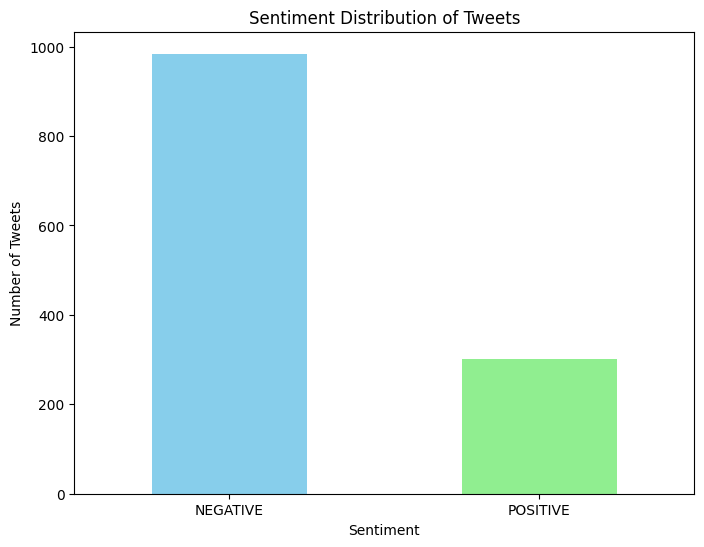

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

# Plotting a bar chart for sentiment distribution
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

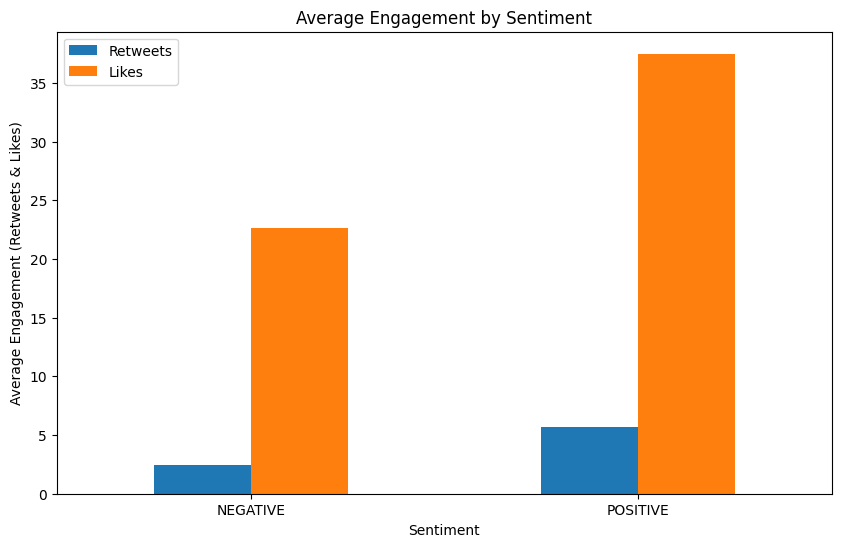

In [ ]:
df.groupby('Sentiment')[['Retweets', 'Likes']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Engagement (Retweets & Likes)')
plt.xticks(rotation=0)
plt.show()